# Softmax Classification

### tensorflow로 Softmax Classification을 구현하여 여러 class 데이터의 분류를 해보고자 한다.

In [55]:
##tenssorflow==2.3 환경에서 구현  
import tensorflow as tf
import numpy as np
# weigh와 bias 변수 설정
w = tf.Variable(tf.random.uniform([2,3]))
b = tf.Variable(tf.random.uniform([3]))
#2D 데이터에서 특정 직선에 따라서 3개의 class로 나누어지는 데이터(class a=[1,0,0], class b=[0,1,0], class c=[0,0,1])
#input data
label_x=np.array([[3,2],[2,2],[2,3],[3,4],[1,5],[5,5],[5,7],[6,6],[7,5],[8,5],[6,11],[7,12],[8,10],[9,11],[10,10]],dtype=np.float32)
#output data
label_y=np.array([[1,0,0],[1,0,0],[1,0,0],[1,0,0],[1,0,0],[0,1,0],[0,1,0],[0,1,0],[0,1,0],[0,1,0],[0,0,1],[0,0,1],[0,0,1],[0,0,1],[0,0,1]],dtype=np.float32)

In [57]:
#loss function 정의
def loss_function():
#softmax function으로 pred_y값을 도출하고 categorical cross entropy loss를 loss function으로 loss 값도출
  z= tf.matmul(label_x,w)+b
  pred_y = tf.nn.softmax(z)
  cost = -tf.reduce_mean(tf.reduce_sum(label_y * tf.math.log(pred_y),axis=1))#categorical cross entropy loss를 loss function으로 활용
  return cost
optimizer = tf.optimizers.Adam(learning_rate=0.01) #보편적으로 가장 많이 사용하는 adam optimizer 활용
for step in range(10000): #train
    cost_val=optimizer.minimize(loss_function, var_list=[w,b])
    if step % 100 == 0:
        print(step,"loss_value:", loss_function().numpy())

0 loss_value: 0.92258793
100 loss_value: 0.54017335
200 loss_value: 0.42786142
300 loss_value: 0.35728648
400 loss_value: 0.3071434
500 loss_value: 0.2685879
600 loss_value: 0.23752412
700 loss_value: 0.21175696
800 loss_value: 0.18996534
900 loss_value: 0.17128257
1000 loss_value: 0.15510185
1100 loss_value: 0.1409773
1200 loss_value: 0.12856857
1300 loss_value: 0.11760847
1400 loss_value: 0.10788236
1500 loss_value: 0.09921506
1600 loss_value: 0.091461584
1700 loss_value: 0.084500834
1800 loss_value: 0.07823089
1900 loss_value: 0.072565444
2000 loss_value: 0.06743093
2100 loss_value: 0.062764354
2200 loss_value: 0.058511756
2300 loss_value: 0.054626547
2400 loss_value: 0.05106841
2500 loss_value: 0.047802385
2600 loss_value: 0.044797968
2700 loss_value: 0.04202853
2800 loss_value: 0.039470863
2900 loss_value: 0.03710437
3000 loss_value: 0.03491098
3100 loss_value: 0.03287475
3200 loss_value: 0.03098152
3300 loss_value: 0.02921871
3400 loss_value: 0.027575037
3500 loss_value: 0.026040

In [95]:
#최종 train accuracy 측정
pred_y = tf.nn.softmax(tf.matmul(label_x,w)+b)
argmax_y=tf.argmax(label_y,1) #label 데이터의 argmax
pred_final = tf.argmax(pred_y,1)#모델이 예측한 pred_y 데이터의 argmax
accuracy = tf.reduce_mean(tf.cast(tf.equal(pred_final,argmax_y),dtype=tf.float32)) #train_accuracy
print("accuracy:", accuracy.numpy())

accuracy: 1.0


## predict

In [75]:
#test data 설정 및 학습한 모델로 predict
test_x=np.array([[1,3],[6,5],[10,11]],dtype=np.float32) 
test_y=np.array([[1,0,0],[0,1,0],[0,0,1]],dtype=np.float32)

test_pred= tf.nn.softmax(tf.matmul(test_x,w)+b)
test_argmax_y=tf.argmax(test_y,1)
test_pred_final= tf.argmax(test_pred,1) 
test_accuracy = tf.reduce_mean(tf.cast(tf.equal(test_pred_final,test_argmax_y),dtype=tf.float32)) #test_accuracy
print("accuracy:", test_accuracy.numpy())

accuracy: 1.0


## plot result

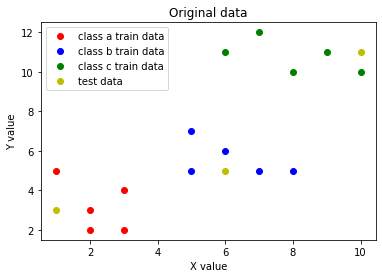

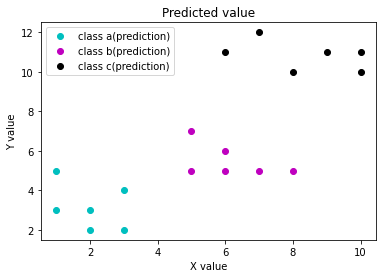

In [98]:
import matplotlib.pyplot as plt
test_pred_final=np.array(test_pred_final)
pred_final=np.array(pred_final)
argmax_y=np.array(argmax_y)
#label_x,test_x 데이터에서 x축, y축 데이터 분리
label_x_x1=label_x[:,0]
label_x_y1=label_x[:,1]

test_x_x1=test_x[:,0]
test_x_y1=test_x[:,1]

#시각화를 위해 class a([1,0,0]), b([0,1,0]), c([0,0,1])에 따라서 데이터를 분리한 후, 결과 plot
label_x_x1_0=label_x_x1[argmax_y==0] 
label_x_x1_1=label_x_x1[argmax_y==1]
label_x_x1_2=label_x_x1[argmax_y==2]
label_x_y1_0=label_x_y1[argmax_y==0] 
label_x_y1_1=label_x_y1[argmax_y==1]
label_x_y1_2=label_x_y1[argmax_y==2]
# original data plot
plt.figure()
plt.title("Original data")
plt.xlabel("X value")
plt.ylabel("Y value")
plt.plot(label_x_x1_0, label_x_y1_0, 'ro', label='class a train data')
plt.plot(label_x_x1_1, label_x_y1_1,'bo', label='class b train data')
plt.plot(label_x_x1_2, label_x_y1_2,'go', label='class c train data')
plt.plot(test_x_x1, test_x_y1,'yo', label='test data')
plt.legend()
plt.show()

pred_x_x1_0=label_x_x1[pred_final==0] 
pred_x_x1_1=label_x_x1[pred_final==1]
pred_x_x1_2=label_x_x1[pred_final==2]
pred_x_y1_0=label_x_y1[pred_final==0] 
pred_x_y1_1=label_x_y1[pred_final==1]
pred_x_y1_2=label_x_y1[pred_final==2]

pred_test_x_x1_0=test_x_x1[test_pred_final==0]
pred_test_x_x1_1=test_x_x1[test_pred_final==1]
pred_test_x_x1_2=test_x_x1[test_pred_final==2]
pred_test_x_y1_0=test_x_y1[test_pred_final==0]
pred_test_x_y1_1=test_x_y1[test_pred_final==1]
pred_test_x_y1_2=test_x_y1[test_pred_final==2]

# preidicted value plot
plt.figure()
plt.title("Predicted value")
plt.xlabel("X value")
plt.ylabel("Y value")
plt.plot(pred_x_x1_0, pred_x_y1_0, 'co', label='class a(prediction)')
plt.plot(pred_x_x1_1, pred_x_y1_1,'mo', label='class b(prediction)')
plt.plot(pred_x_x1_2, pred_x_y1_2,'ko', label='class c(prediction)')
plt.plot(pred_test_x_x1_0, pred_test_x_y1_0,'co')
plt.plot(pred_test_x_x1_1, pred_test_x_y1_1,'mo')
plt.plot(pred_test_x_x1_2, pred_test_x_y1_2,'ko')
plt.legend()
plt.show()